# Linear Regression

This notebook follows the tutorial [pythonprogramming.net](https://pythonprogramming.net/machine-learning-tutorial-python-introduction/) I just added some comments.

In [57]:
import pandas as pd
import quandl, math,datetime
import numpy as np

from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import style

import pickle
style.use("ggplot")

import time

mpl.rcParams['mathtext.fontset'] = 'cm'
%config InlineBackend.figure_format = 'retina'

In [58]:
df=quandl.get("WIKI/GOOGL")

In [59]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [60]:
df=df[["Adj. Open","Adj. Close","Adj. High","Adj. Low","Adj. Volume"]]

In [61]:
df["HL_PCT"] = (df["Adj. High"]-df["Adj. Low"])/df["Adj. Low"] * 100.0

In [62]:
df["PCT_change"] = (df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"] * 100.0

In [63]:
df = df[["Adj. Close","HL_PCT","PCT_change","Adj. Volume"]]

In [64]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [65]:
forecast_col="Adj. Close"
df.fillna(-99999, inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))

In [66]:
df["label"]=df[forecast_col].shift(-forecast_out)

In [67]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [68]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.818025,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.707965,-5.353887,2940957.0,NaN


In [69]:
df.dropna(inplace=True)

In [70]:
X = np.array(df.drop(["label"],1))
X=preprocessing.scale(X)
y=np.array(df["label"])

In [71]:
print(np.shape(X),np.shape(y))

(3389, 4) (3389,)


In [72]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)
print(np.shape(X_train),np.shape(X_test))
print(np.shape(y_train),np.shape(y_test))

(2711, 4) (678, 4)
(2711,) (678,)


In [73]:
print(np.shape(X_train)[0]+np.shape(X_test)[0])
print(np.shape(y_train)[0]+np.shape(y_test)[0])

3389
3389


In [74]:
clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.9782839264894085


In [75]:
clf=svm.SVR(gamma='auto')
#clf.fit(X_train,y_train)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.803598561027308


In [76]:
clf=svm.SVR(kernel='poly',gamma='auto')
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.6620826158115827


1 361032.24754333496
2 344076.15661621094
3 368046.52214050293
4 353913.3071899414
5 386971.71211242676
6 384022.71270751953
7 337995.7675933838
8 376697.5402832031
9 376541.3761138916
10 364142.41790771484


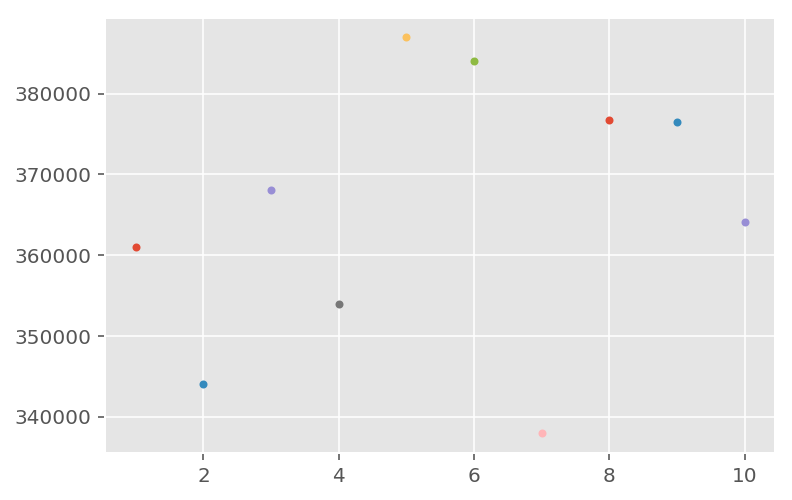

In [77]:
for i in range(1,11):
    begin=time.time()
    clf=LinearRegression(n_jobs=i)
    clf.fit(X_train,y_train)
    accuracy=clf.score(X_test,y_test)
    dt=time.time()-begin
    print(i,dt*1000000)
    plt.plot(i,dt*1000000,'.')
plt.show()

In [78]:
print(begin)

1564766913.6662214


In [79]:
df=quandl.get("WIKI/GOOGL")
df=df[["Adj. Open","Adj. Close","Adj. High","Adj. Low","Adj. Volume"]]
df["HL_PCT"] = (df["Adj. High"]-df["Adj. Close"])/df["Adj. Close"] * 100.0
df["PCT_change"] = (df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"] * 100.0
df = df[["Adj. Close","HL_PCT","PCT_change","Adj. Volume"]]
df.fillna(-99999, inplace=True)
df["label"]=df[forecast_col].shift(-forecast_out)

In [80]:
X = np.array(df.drop(["label"],1))

X=preprocessing.scale(X)

X= X[:-forecast_out]
X_lately=X[-forecast_out:]


df.dropna(inplace=True)
y=np.array(df["label"])


In [81]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

clf=LinearRegression()

clf.fit(X_train,y_train)

accuracy=clf.score(X_test,y_test)

#print(accuracy)


forecast_set=clf.predict(X_lately)

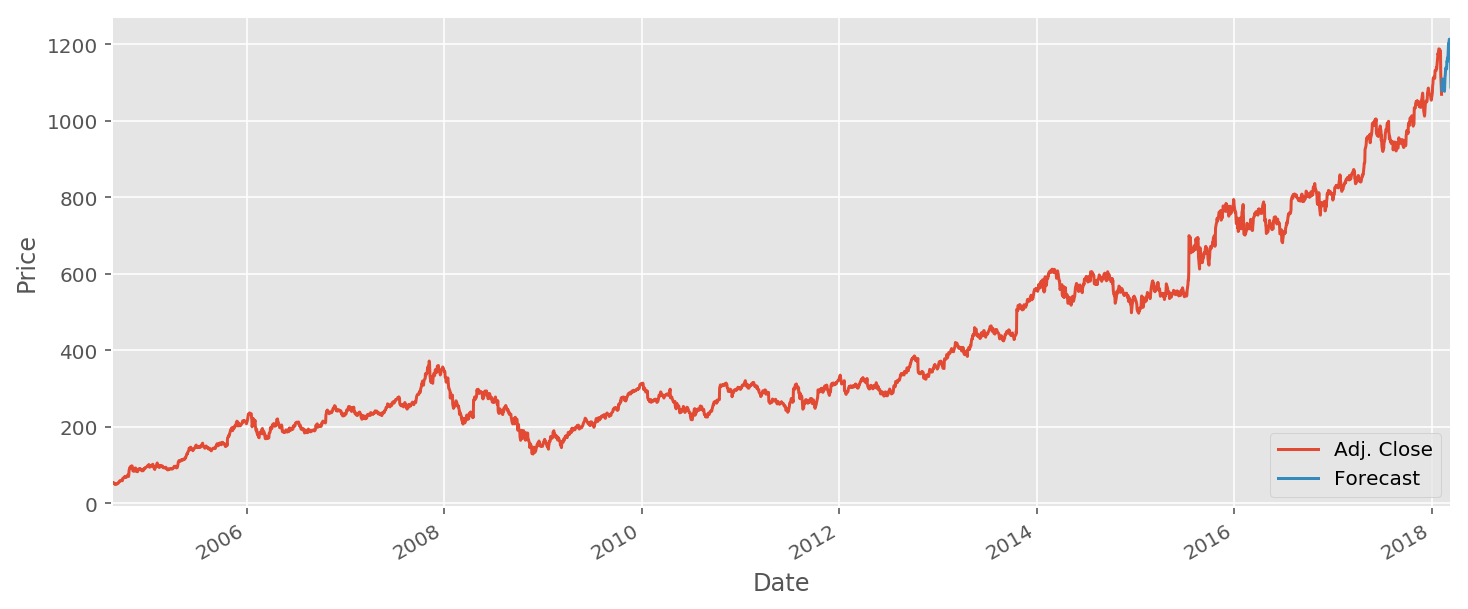

In [82]:
df["Forecast"]=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()

one_day=86400

next_unix=last_unix+one_day
plt.figure(figsize=(12,5))
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)]+ [i]
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


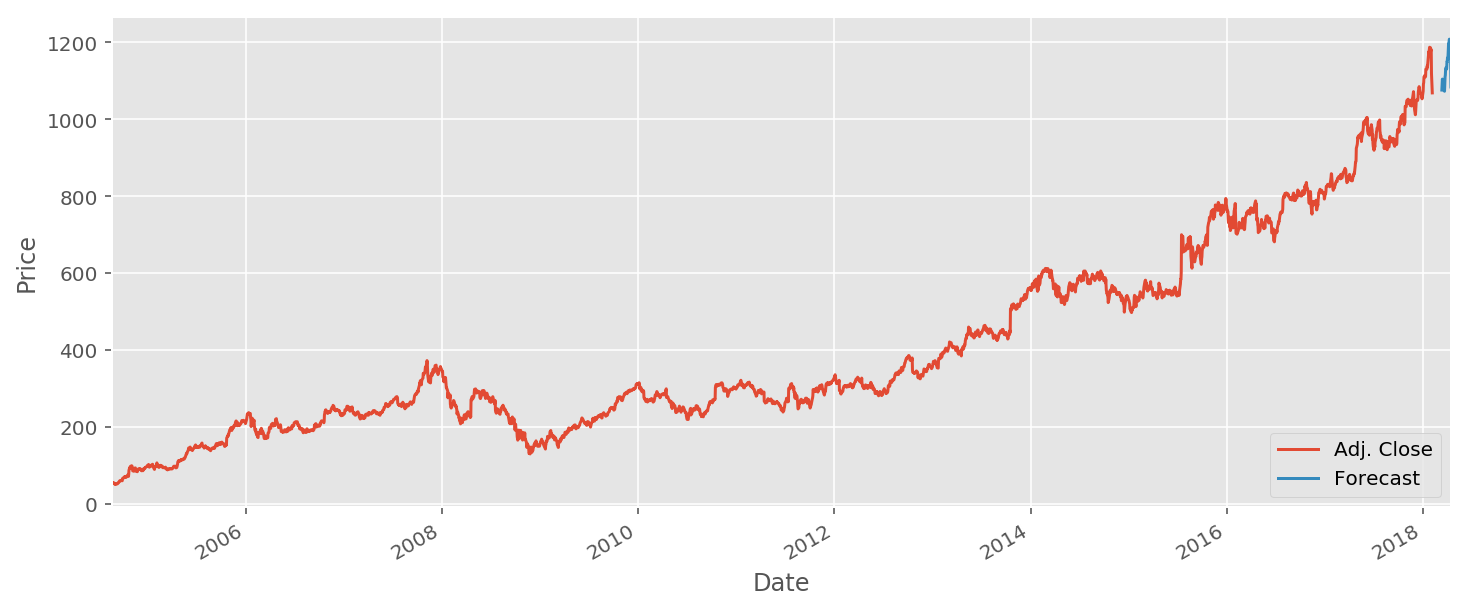

In [83]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)

with open ('linearregession.pickle','wb') as f:
    pickle.dump(clf,f)

pickle_in = open('linearregession.pickle','rb')

clf2=pickle.load(pickle_in)

accuracy=clf2.score(X_test,y_test)

forecast_set=clf2.predict(X_lately)

df["Forecast"]=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()

one_day=86400

next_unix=last_unix+one_day

plt.figure(figsize=(12,5))
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)]+ [i]
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()